In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

df = pd.read_csv('Data/train.csv')
X = df.drop(columns=['Id', 'Pawpularity', 'Occlusion'])
y = df[['Occlusion']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(X_train.head())
print(y_train.head())

print(f'Number of features in X_train: {X_train.shape[1]}')

      Subject Focus  Eyes  Face  Near  Action  Accessory  Group  Collage  \
2838              0     1     1     1       0          0      0        0   
1225              0     0     1     1       0          0      0        0   
7126              0     1     1     1       0          0      1        0   
1701              0     1     1     1       0          0      0        0   
3214              0     1     1     1       0          0      0        0   

      Human  Info  Blur  
2838      0     0     0  
1225      0     0     0  
7126      0     0     0  
1701      0     0     0  
3214      0     0     0  
      Occlusion
2838          0
1225          0
7126          0
1701          0
3214          0
Number of features in X_train: 11


In [42]:
clf = GaussianNB()
clf.fit(X_train, y_train)

c:\Users\Christian\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [43]:
print(clf.class_prior_)
print(clf.theta_)

[0.82862524 0.17137476]
[[0.03279221 0.76915584 0.90275974 0.86331169 0.00909091 0.06964286
  0.12564935 0.04204545 0.05941558 0.04675325 0.07288961]
 [0.         0.79513344 0.91836735 0.85949765 0.00627943 0.04788069
  0.1310832  0.07535322 0.69230769 0.12166405 0.06828885]]


In [44]:
y_pred = clf.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  98 1949]
 [   5  426]]


c:\Users\Christian\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Christian\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


IndexError: DataFrame indexer is not allowed for .iloc
Consider using .loc for automatic alignment.

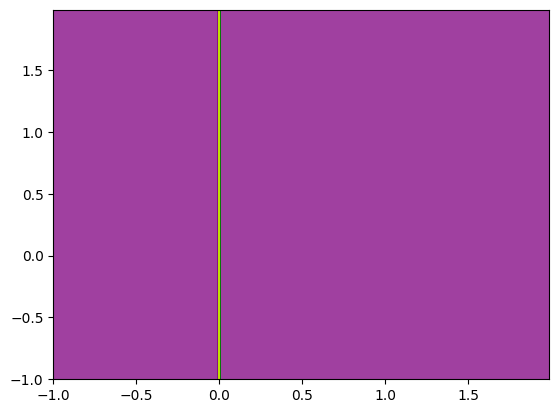

In [48]:
from matplotlib.colors import ListedColormap
import numpy as np


# Assuming clf is a previously created GaussianNB instance and X_train, y_train are pandas DataFrames/Series
clf = GaussianNB()

# Fit the model using the first two columns of X_train
clf.fit(X_train.iloc[:, :2], y_train)

# Set up the data for visualization
x_set, y_set = X_train.iloc[:, :2], y_train

# Create a meshgrid for plotting decision boundaries
X1, X2 = np.meshgrid(np.arange(start=x_set.iloc[:, 0].min() - 1, stop=x_set.iloc[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set.iloc[:, 1].min() - 1, stop=x_set.iloc[:, 1].max() + 1, step=0.01))

# Make predictions on the grid points and reshape to match the meshgrid shape
Z = clf.predict(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)

# Plot the decision boundaries
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('purple', 'green', 'yellow')))

# Set limits for x and y axes
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot the training points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set.iloc[y_set == j, 0], x_set.iloc[y_set == j, 1],
                color=ListedColormap(('purple', 'green', 'yellow'))(i), label=j)

# Display the legend and show the plot
plt.legend()
plt.show()